## Python Libraries and Preliminary Setup

We leveraged a few Python libraries that needed installation first. Some users will likely already have some of these libraries installed.

### Natural Language Toolkit
Provides a corpus of english words to use for comparing our generator output against plain english.
```
$ pip install nltk
```

### urllib: URL Handling Tools
Allows us to programmatically access files from URLs on the guterberg project and elsewhere.
```
$ pip install urllib
```

### SciKit Learn
Allows us to calculate Term-Frequency * Inverse Document Frequency (TF-IDF) to measure how unique our markov-generated words are in comparison to the original words in the corpus. We also need a 
```
$ pip install sklearn
```

### matplotlib: Math Plotting Library
Allows us to use Pyplot, a useful plotting tool.
```
$ pip install matplotlib
```

### NumPy
Allows us to calculate the most frequent occurrences in our markov-generated text for analysis purposes.
```
$ pip install numpy
```


In [2]:
%%capture hide_output
%load_ext autoreload
%autoreload 2
%matplotlib inline

import nltk
import validators
import matplotlib.pyplot as plt
import numpy as np

import markov_with_syllables as markov
from syllablizer import syllablize
from analysis import analyze_markov_syllables as analyze
import get_text
from tfidf import num_nonzero_tokens

We found a number of selections of texts, including books from Project Gutenberg and, and we created a dictionary of thoese texts in `get_text.py`, which contains helper functions to get those books as strings for analysis.

In [3]:
corpora = get_text.get_texts("all")
titles = list(corpora.keys())
texts = list(corpora.values())
print(f"Texts in the dictionary are: {list(titles)}")

Texts in the dictionary are: ['Iliad', 'Canterbury Tales', 'Romeo and Juliet', 'Great Gatsby', 'Monty Python', "Finnegan's Wake"]


If we want to add a limited selection of texts to our dictionary for analysis, or if we later want to add additional texts to our analysis corpora we can use the function `add_text`.

Next, we use functions from `helper.py` to give some data about our corpora.

In [4]:
max_words = 10000
texts_analysis = analyze(texts, max_words=max_words, verbose=False)
num_tokens = num_nonzero_tokens(titles)

<class 'list'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


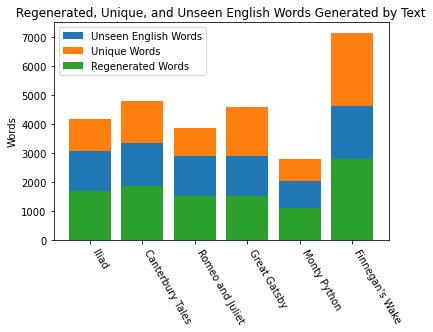

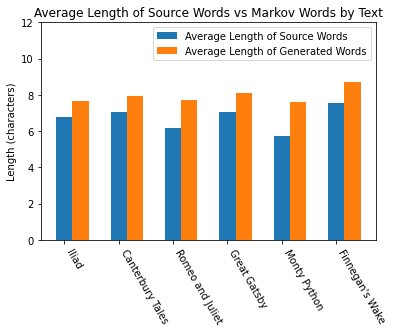

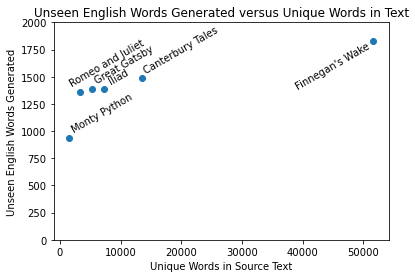

In [5]:
unique = []
regen = []
re_sum = []
english = []
ure_sum = []
repeats = []
word_len = []
markov_len = []
for index in range(len(corpora)):
    analysis = texts_analysis[index]
    unique.append(analysis["unique_count"])
    regen.append(analysis["regenerated_count"])
    english.append(analysis["english_count"])
    re_sum.append(regen[-1] + english[-1])
    ure_sum.append(re_sum[-1] + unique[-1])
    repeats.append(max_words - ure_sum[-1])
    word_len.append(analysis["average_word_length"])
    markov_len.append(analysis["average_unique_markov_word_length"])

fig, ax = plt.subplots()
ax.bar(titles, english, label="Unseen English Words", bottom=regen)
ax.bar(titles, unique, label="Unique Words", bottom=re_sum)
ax.bar(titles, regen, label="Regenerated Words")
ax.set_ylabel("Words")
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.title("Regenerated, Unique, and Unseen English Words Generated by Text")
plt.show()

fig, ax = plt.subplots()
width = 0.3
indexes = np.arange(len(corpora))
ax.bar(titles, word_len, width, label="Average Length of Source Words")
ax.bar(indexes+width, markov_len, width, label="Average Length of Generated Words")
ax.set_ylabel("Length (characters)")
ax.set_ylim([0, 12])
for tick in ax.get_xticklabels():
    tick.set_rotation(-60)
    tick.set_horizontalalignment("left")
ax.legend()
plt.title("Average Length of Source Words vs Markov Words by Text")
plt.show()

fig, ax = plt.subplots()
ax.scatter(num_tokens, english);
x_offset = [500, 100, -2000, 100, 100, -13000]
y_offset = [50, 50, 50, 50, 50, -450]
for index,book in enumerate(titles):
    plt.text(num_tokens[index] + x_offset[index], english[index] + y_offset[index], book, rotation=30)
ax.set_xlabel("Unique Words in Source Text");
ax.set_ylabel("Unseen English Words Generated");
ax.set_ylim([0,2000])
plt.title("Unseen English Words Generated versus Unique Words in Text")
plt.show()